#Q1. Perform linear regression from scratch without any library on the dataset, and also calculate square sum of error, slope, and intercepts of the best fitting line, show the graphs. Show the error graph. 

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]
Predicted values  [ 40594.69 123305.18  65031.88  63152.1  115786.04 108266.91 116725.93
  64091.99  76310.58 100747.77]
Real values       [ 37731 122391  57081  63218 116969 109431 112635  55794  83088 101302]
Trained W         9398.92
Trained b         26496.31
X-intercept       -2.82
Y-intercept       26496.31
Slope             9398.92


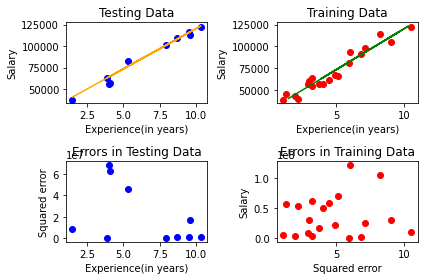

In [ ]:
# Importing libraries 
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
  
class LinearRegression() : 
    def __init__( self, learning_rate, iterations ) : 
        self.learning_rate = learning_rate 
        self.iterations = iterations 
      
    # Function for model training       
    def fit( self, X, Y ) : 
        # no_of_training_examples, no_of_features  
        self.m, self.n = X.shape 
          
        # weight initialization 
        self.W = np.zeros( self.n ) 
        self.b = 0
        self.X = X 
        self.Y = Y  
          
        # gradient descent learning          
        for i in range( self.iterations ):
            self.update_weights() 
        return self

    # Helper function to update weights in gradient descent    
    def update_weights( self ):    
        Y_pred = self.predict( self.X ) 
          
        # calculate gradients   
        dW = - ( 2 * ( self.X.T ).dot( self.Y - Y_pred )  ) / self.m 
        db = - 2 * np.sum( self.Y - Y_pred ) / self.m  
          
        # update weights 
        self.W = self.W - self.learning_rate * dW 
        self.b = self.b - self.learning_rate * db 

        return self
      
    # Hypothetical function  h( x )  
    def predict( self, X ) : 
        return X.dot( self.W ) + self.b 

  
def main() : 
      
    # Importing dataset  
    df = pd.read_csv( "lr_dataset.csv" ) 
    X = df.iloc[:,:-1].values 
    Y = df.iloc[:,1].values

    print(X)
    print(Y)
      
    # Splitting dataset into train and test set 
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 1/3, random_state = 0 ) 
      
    # Model training    
    model = LinearRegression( iterations = 1000, learning_rate = 0.01 ) 
    model.fit( X_train, Y_train ) 
      
    # Prediction on test set 
    Y_pred = model.predict( X_test ) 
      
    print( "Predicted values ", np.round( Y_pred[:10], 2 ) )  
    print( "Real values      ", Y_test[:10] )  
    print( "Trained W        ", round( model.W[0], 2 ) ) 
    print( "Trained b        ", round( model.b, 2 ) ) 
    print( "X-intercept      ", round( -model.b/model.W[0], 2 ) )
    print( "Y-intercept      ", round( model.b, 2 ) )
    print( "Slope            ", round( model.W[0], 2 ) )
    # Visualization on test set

    residual=[]
    for i in range(len(Y_test)):
        residual.append((Y_test[i] - Y_pred[i])**2)
    
    error=[]
    for i in range(len(Y_train)):
        Y=model.W[0] * X_train[i] + model.b
        error.append((Y - Y_train[i])**2)

    fig,axis = plt.subplots(2,2)

    axis[0,0].scatter( X_test, Y_test, color = 'blue' ) 
    axis[0,0].plot( X_test, Y_pred, color = 'orange' )

    axis[0,1].scatter( X_train,Y_train, color = 'red')
    axis[0,1].plot( X_test, Y_pred, color = 'green' )

    axis[1,0].scatter(X_test,residual,color='blue')

    axis[1,1].scatter(X_train,error,color='red')
    
    axis[0,0].set_title( 'Testing Data' )
    axis[0,1].set_title( 'Training Data' )
    axis[1,0].set_title( 'Errors in Testing Data' )
    axis[1,1].set_title( 'Errors in Training Data' )
    
    plt.setp(axis[0,0],xlabel="Experience(in years)")
    plt.setp(axis[0,0],ylabel="Salary")
    plt.setp(axis[0,1],xlabel="Experience(in years)")
    plt.setp(axis[0,1],ylabel="Salary")
    plt.setp(axis[1,0],xlabel="Experience(in years)")
    plt.setp(axis[1,0],ylabel="Squared error")
    plt.setp(axis[1,1],xlabel="Squared error")
    plt.setp(axis[1,1],ylabel="Salary")

    fig.tight_layout()
    plt.show()

     
if __name__ == "__main__" :  
    main()


#Q2.

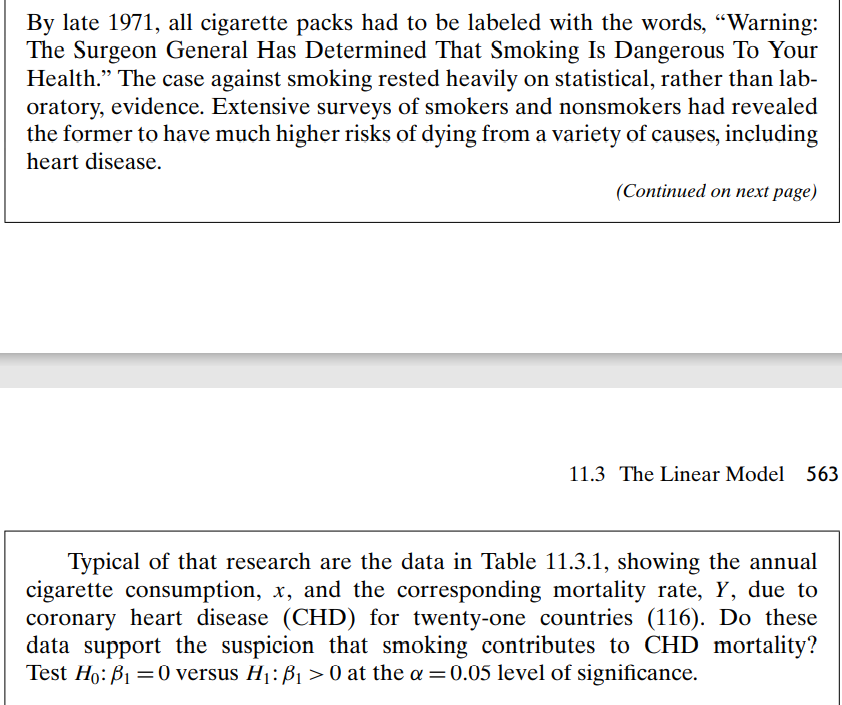

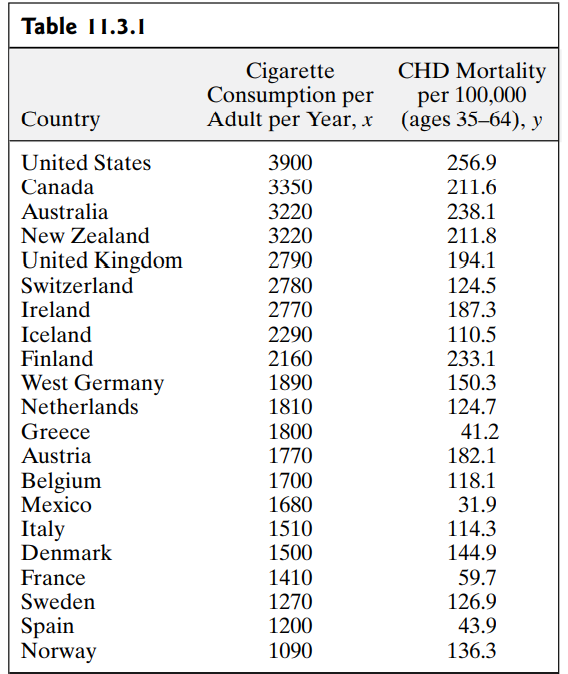

In [ ]:
# Importing libraries 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df=pd.read_csv('smoking_dataset.csv')
df.head()

,Country,Cigarette_consumption,CHD_Mortality
0,United States,3900,256.9
1,Canada,3350,211.6
2,Australia,3220,238.1
3,New Zealand,3220,211.8
4,United Kingdom,2790,194.1


In [9]:
list_of_columns=list(df.columns)
print(list_of_columns)
# df=df.drop(columns='Country')

['Cigarette_consumption', 'CHD_Mortality']


In [ ]:
X=df.drop(columns='CHD_Mortality')
Y=df['CHD_Mortality']
X=X/X.max()
print(X)
print(Y)
m=len(X)

    Cigarette_consumption
0                1.000000
1                0.858974
2                0.825641
3                0.825641
4                0.715385
5                0.712821
6                0.710256
7                0.587179
8                0.553846
9                0.484615
10               0.464103
11               0.461538
12               0.453846
13               0.435897
14               0.430769
15               0.387179
16               0.384615
17               0.361538
18               0.325641
19               0.307692
20               0.279487
0     256.9
1     211.6
2     238.1
3     211.8
4     194.1
5     124.5
6     187.3
7     110.5
8     233.1
9     150.3
10    124.7
11     41.2
12    182.1
13    118.1
14     31.9
15    114.3
16    114.9
17     59.7
18    126.9
19     43.9
20    136.3
Name: CHD_Mortality, dtype: float64


In [10]:
def hypothesis2(X,beta0,beta1): #findind h(x) for case2
    y1=beta1*X+beta0
    #print('printing y1 ')
    #print(y1)
    #print('printedd')
    return y1

def cost2(X,Y,beta0,beta1,m):   #cost func for case2
    y1=hypothesis2(X,beta0,beta1)
    return np.sum((y1-Y)**2)/(2*m)

def gradient_desc2(X,Y,theta0,theta1,alpha,epoch,m):
    J=[]
    k=0
    #print('new')
    while k<epoch:
        #print('here')
        y1=hypothesis2(X,theta0,theta1)
        dbeta1 = (1/m) * np.sum((y1 - Y) * X)
        dbeta0 = (1/m) * np.sum((y1 - Y) * 1)

        theta0=theta0-(alpha*dbeta0)
        theta1=theta1-(alpha*dbeta1)
        j=cost2(X,Y,theta0,theta1,m)
        J.append(j)
        k=k+1
    return J,theta0,theta1

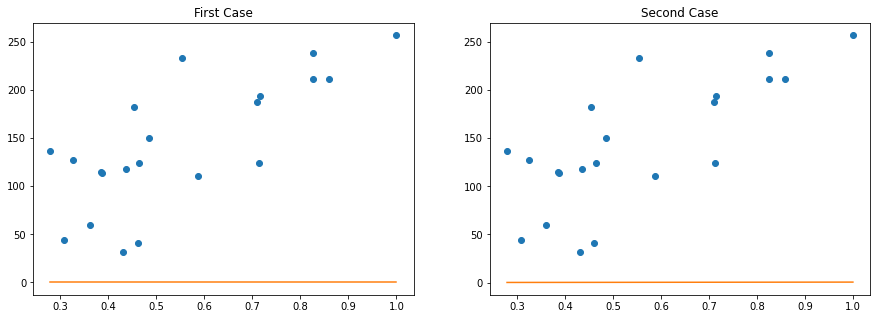

In [12]:
# Y = beta0 + beta1(X)
beta0=0.0
beta1=0.0 #np.zeros(X.shape)  #case 1 - beta1=0
alpha=0.05
epoch=10

J,beta0,beta1=gradient_desc2(X,Y,beta0,beta1,alpha,epoch,m)
y1=hypothesis2(X,beta0,beta1)
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.title('First Case')
plt.scatter(X,Y)
plt.plot(X,y1)
beta0=0.0
beta1=0.5
J,beta0,beta1=gradient_desc2(X,Y,beta0,beta1,alpha,epoch,m) #find the value of beta0 which minimizes cost func
y1=hypothesis2(X,beta0,beta1)
plt.subplot(1,2,2)
plt.title('Second Case')
plt.scatter(X,Y)
plt.plot(X,y1)
plt.show()

#Q3. Perform polynomial regression from scratch without using library on the dataset. Choose dataset from internet. Take the polynomial degree as 3. Show the all graphs, and values. 

In [ ]:
import pandas as pd
df = pd.read_csv('pr_dataset.csv')
df.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


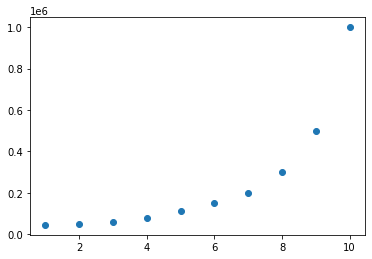

In [ ]:
m=len(df)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(df['Level'], df['Salary'])
plt.show()

In [ ]:
df = pd.concat([pd.Series(1, index=df.index, name='00'), df], axis=1)
df.head()

,00,Position,Level,Salary
0,1,Business Analyst,1,45000
1,1,Junior Consultant,2,50000
2,1,Senior Consultant,3,60000
3,1,Manager,4,80000
4,1,Country Manager,5,110000


In [ ]:
df = df.drop(columns='Position')

y = df['Salary']
y[:5]

0     45000
1     50000
2     60000
3     80000
4    110000
Name: Salary, dtype: int64

In [ ]:
X = df.drop(columns = 'Salary')
X.head()

,00,Level
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [ ]:
X['Level1'] = X['Level']**2
X['Level2'] = X['Level']**3
X.head()

,00,Level,Level1,Level2
0,1,1,1,1
1,1,2,4,8
2,1,3,9,27
3,1,4,16,64
4,1,5,25,125


In [ ]:
X = X/X.max()
import numpy as np
theta = np.array([0]*len(X.columns))

def hypothesis(X, theta):
    y1 = theta*X
    return np.sum(y1, axis=1)

def cost(X, y, theta):
    y1 = hypothesis(X, theta)
    return sum(np.sqrt((y1-y)**2))/(2*m)

def gradientDescent(X, y, theta, alpha, epoch):
    J=[]
    k=0
    while k < epoch:
        y1 = hypothesis(X, theta)
        for c in range(0, len(X.columns)):
            theta[c] = theta[c] - alpha*sum((y1-y)* X.iloc[:, c])/m
        j = cost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta

theta = np.array([0.0]*len(X.columns))
J, j, theta = gradientDescent(X, y, theta, 0.05, 700)

print(theta)

[-38494.26294331  66878.12378747 287369.29171661 460744.26580885]


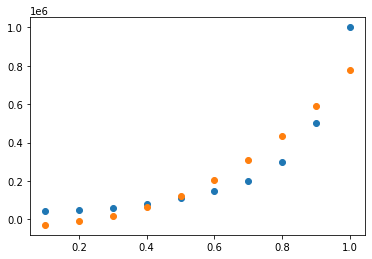

In [ ]:
y_hat = theta*X
y_hat = np.sum(y_hat, axis=1)

%matplotlib inline
import matplotlib.pyplot as plt
plt.figure()
plt.scatter(x=X['Level'],y= y)          
plt.scatter(x=X['Level'], y=y_hat)
plt.show()